In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/Users/vaibhav/Desktop/Coding/Advance Data Science Project/stroke_app/data/Training_data/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

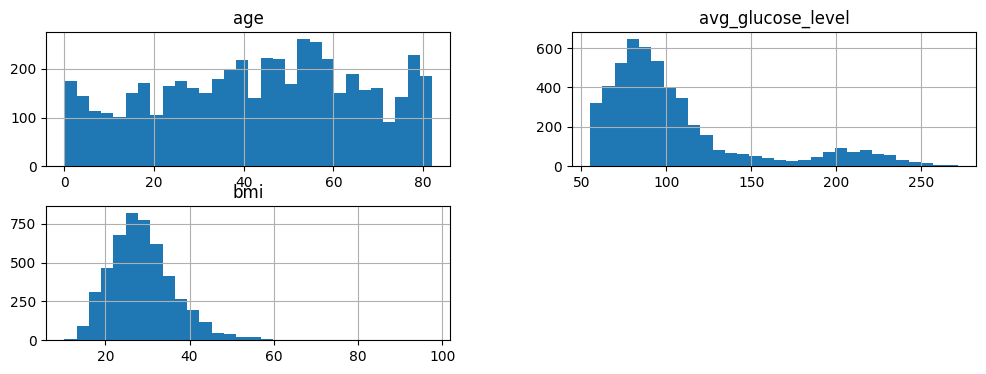

In [3]:
df[["age","avg_glucose_level","bmi"]].hist(bins=30, figsize=(12,4))
plt.show()

In [4]:
df.stroke.value_counts()
df.stroke.value_counts(normalize=True)

stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64

<Axes: xlabel='gender', ylabel='count'>

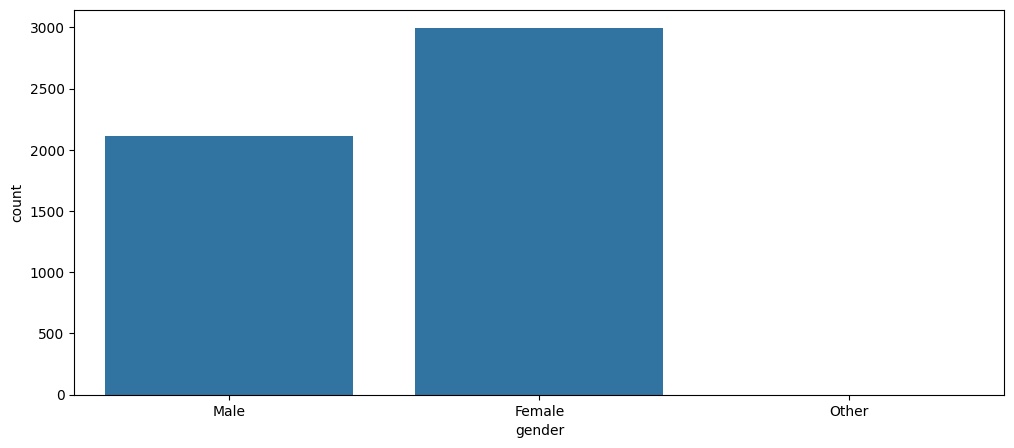

In [5]:
plt.figure(figsize=(12,5))
sns.countplot(x="gender", data=df)

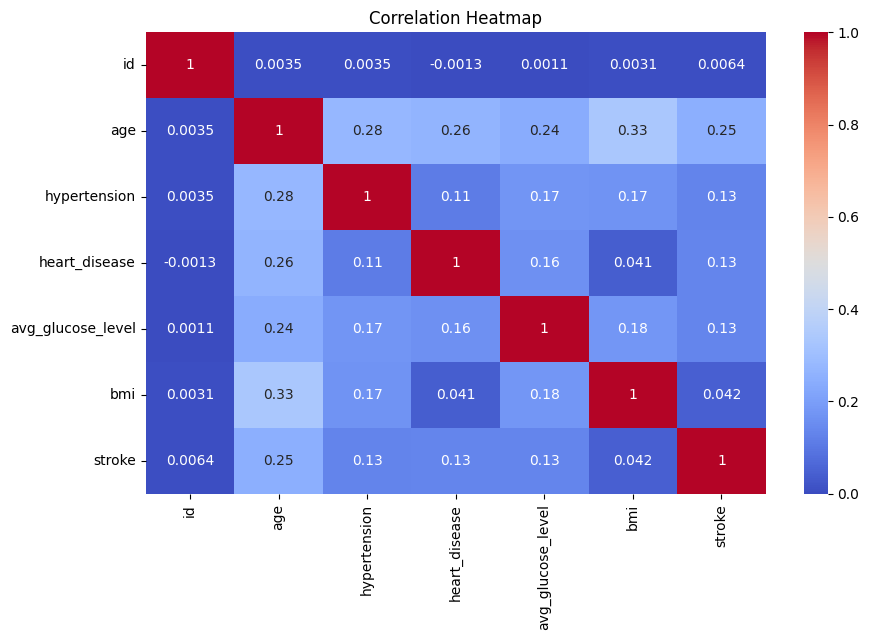

In [6]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

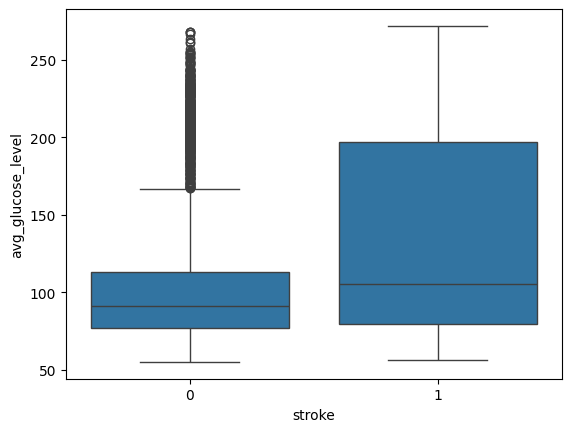

In [7]:
sns.boxplot(x="stroke", y="avg_glucose_level", data=df)
plt.show()

In [8]:
import joblib
model = joblib.load("/Users/vaibhav/Desktop/Coding/Advance Data Science Project/stroke_app/models/stroke_pipeline.joblib")

# extract final estimator
clf = model.named_steps["clf"]

# this only works for logistic regression
importance = clf.coef_

importance

array([[ 1.61739336,  0.20601895, -0.05071337,  0.01684978, -0.00196661,
        -0.02304846, -0.17156556,  0.16340027, -0.14067056,  0.13250527,
         0.06585848, -0.07402378,  0.05180013, -0.08008687,  0.0860475 ,
        -0.23066943,  0.16474338, -0.00254388, -0.00562141, -0.09797106,
         0.02100468, -0.15858675,  0.22738784]])